Use this cell for all your imports

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix
from scipy.sparse import csr_matrix


You will be working with the file data.txt. Use this cell to load its content into the appropriate data structure.

In [9]:
# Read the graph data from file and create a directed graph
data = []
with open('C:/Users/ASUS/Downloads/data.txt', 'r') as f:
    for line in f:
        if line.startswith('#'):
            continue
        parts = line.strip().split()
        if len(parts) != 2:
            continue
        data.append((int(parts[0]), int(parts[1])))
graph = nx.DiGraph(data)



Use this cell to normalize the matrix as you see fit.

In [10]:
n_nodes = max(max(pair) for pair in data)
row = [pair[0]-1 for pair in data]  
col = [pair[1]-1 for pair in data]  
adjacency_matrix = csr_matrix(([1]*len(data), (row, col)), shape=(n_nodes, n_nodes))


Apply the PageRank algorithm to the matrix you created.

In [13]:
# Calculate PageRank scores and print top nodes
pagerank_scores = nx.pagerank(graph)
top_nodes = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)[:10]
for node, score in top_nodes:
    print(f"Node: {node}, Score: {score:.6f}")



Node: 9407087, Score: 0.006239
Node: 9503124, Score: 0.004633
Node: 9510017, Score: 0.004385
Node: 9402044, Score: 0.003935
Node: 9711200, Score: 0.003410
Node: 9410167, Score: 0.003407
Node: 9408099, Score: 0.003190
Node: 9207016, Score: 0.003114
Node: 9402002, Score: 0.002962
Node: 9610043, Score: 0.002753


Output a list of the 100 most important papers along with their importance

In [14]:
# Print top 100 nodes and their scores
sorted_nodes = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)[:100]
for node, score in sorted_nodes:
    print(f"Node: {node}, Score: {score:.6f}")



Node: 9407087, Score: 0.006239
Node: 9503124, Score: 0.004633
Node: 9510017, Score: 0.004385
Node: 9402044, Score: 0.003935
Node: 9711200, Score: 0.003410
Node: 9410167, Score: 0.003407
Node: 9408099, Score: 0.003190
Node: 9207016, Score: 0.003114
Node: 9402002, Score: 0.002962
Node: 9610043, Score: 0.002753
Node: 9205068, Score: 0.002662
Node: 9510135, Score: 0.002591
Node: 9201015, Score: 0.002554
Node: 9205027, Score: 0.002459
Node: 9304154, Score: 0.002333
Node: 9802150, Score: 0.002256
Node: 9401139, Score: 0.002246
Node: 9504090, Score: 0.002107
Node: 9802109, Score: 0.002071
Node: 208020, Score: 0.002069
Node: 9305185, Score: 0.002041
Node: 9207053, Score: 0.001993
Node: 9307049, Score: 0.001888
Node: 9204102, Score: 0.001853
Node: 9510209, Score: 0.001809
Node: 9501068, Score: 0.001754
Node: 9906064, Score: 0.001752
Node: 9402032, Score: 0.001721
Node: 9301042, Score: 0.001640
Node: 9403198, Score: 0.001596
Node: 9412184, Score: 0.001550
Node: 9408074, Score: 0.001526
Node: 950

Visualize your results

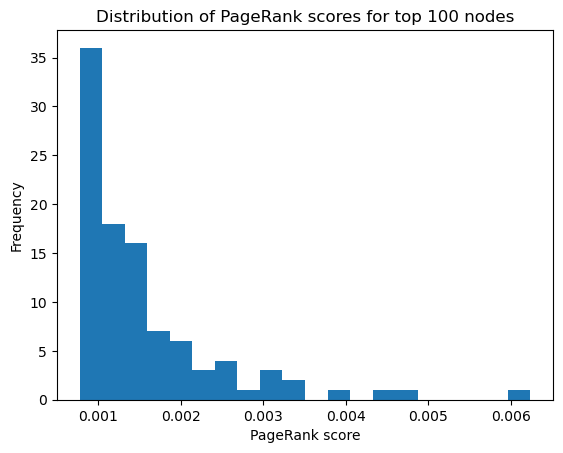

In [5]:
# Plot histogram of PageRank scores for top 100 nodes
scores = [score for node, score in sorted_nodes]
plt.hist(scores, bins=20)
plt.xlabel('PageRank score')
plt.ylabel('Frequency')
plt.title('Distribution of PageRank scores for top 100 nodes')
plt.show()